# Imports

In [1]:
import gzip
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import pyarrow.ipc as ipc
import pyarrow.feather as feather

from utils.loading import *

In [2]:
NOTEBOOK_PATH = os.getcwd()
DATA_PATH = os.path.join(NOTEBOOK_PATH, "data_youniverse")
CATEGORY = "People & Blogs"

# Data loading

In [3]:
df_channels_en = pd.read_csv(os.path.join(DATA_PATH, "df_channels_en.tsv.gz"), compression="infer", sep="\t") 
df_timeseries_en = pd.read_csv(f"{DATA_PATH}/df_timeseries_en.tsv.gz", compression="infer", sep="\t") # 20s
df_feather = feather.read_feather(os.path.join(DATA_PATH, 'yt_metadata_helper.feather'))

### Plot Category distribution

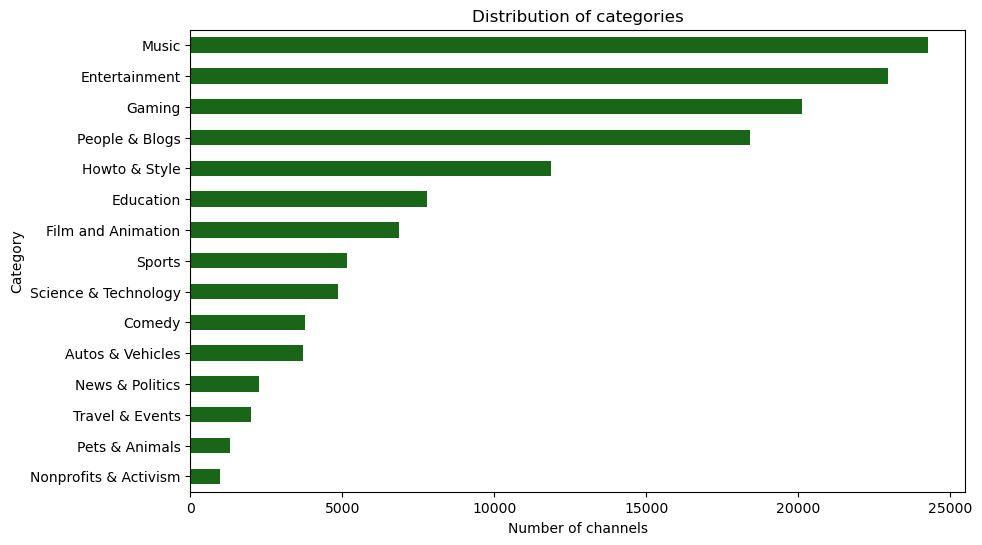

In [4]:
category_value_counts = df_channels_en["category_cc"].value_counts()

# Plot distribution of categories, emphasis on the People & Blogs category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_value_counts.values, y=category_value_counts.index, orient="h", color="g", saturation=0.6, width=0.5)
plt.title("Distribution of categories")
plt.xlabel("Number of channels")
plt.ylabel("Category")
plt.show();

### Read People & Blogs channels' data

In [5]:
CATEGORY_FILE_NAME = ''.join(CATEGORY.split(" ")).lower()
CATEGORY_FILE_PATH = os.path.join(DATA_PATH, f"df_channels_{CATEGORY_FILE_NAME}.tsv.gz")

# yt_metadata_filtered = load_and_filter_jsonl_gz_file_by_chunks(os.path.join(DATA_PATH, "yt_metadata_en.jsonl.gz"), CATEGORY)
# yt_metadata_filtered.drop(columns=["categories"], inplace=True)
# yt_metadata_filtered.to_csv(CATEGORY_FILE_PATH, index=False, compression="gzip")
df_yt_metadata_filtered = pd.read_csv(CATEGORY_FILE_PATH, compression="infer")
df_yt_metadata_filtered['upload_date'] = pd.to_datetime(df_yt_metadata_filtered['upload_date'])
df_yt_metadata_filtered.head()

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,upload_date,view_count
0,People & Blogs,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:35.725333,0.0,LZPh8ky-RP8,175,8.0,"thomas train,thomas toby,thomas salty,thomas p...",2015-11-07,1307.0
1,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:30.405938,613.0,BDnF-EgqAGw,398,49464.0,"vine,vines,vine compilation,chaotic good",2019-02-05,1142835.0
2,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:30.959894,588.0,wrTIXbQED80,375,32726.0,"vines,vine,vine compilation,neutral good,align...",2019-01-31,819654.0
3,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:31.467288,1177.0,uyWL0ZWibyU,335,86222.0,"vine,vines,vine compilation,neutral evil",2019-01-22,2159837.0
4,People & Blogs,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:31.948318,673.0,yd7d51AgSso,319,30596.0,NaN,2019-01-15,736707.0


In [6]:
df_yt_metadata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6910666 entries, 0 to 6910665
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   categories     object        
 1   channel_id     object        
 2   crawl_date     object        
 3   dislike_count  float64       
 4   display_id     object        
 5   duration       int64         
 6   like_count     float64       
 7   tags           object        
 8   upload_date    datetime64[ns]
 9   view_count     float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 527.2+ MB


# Exploratory Data Analysis

## Plot the proportion of videos uploaded per year coming from People & Blogs category

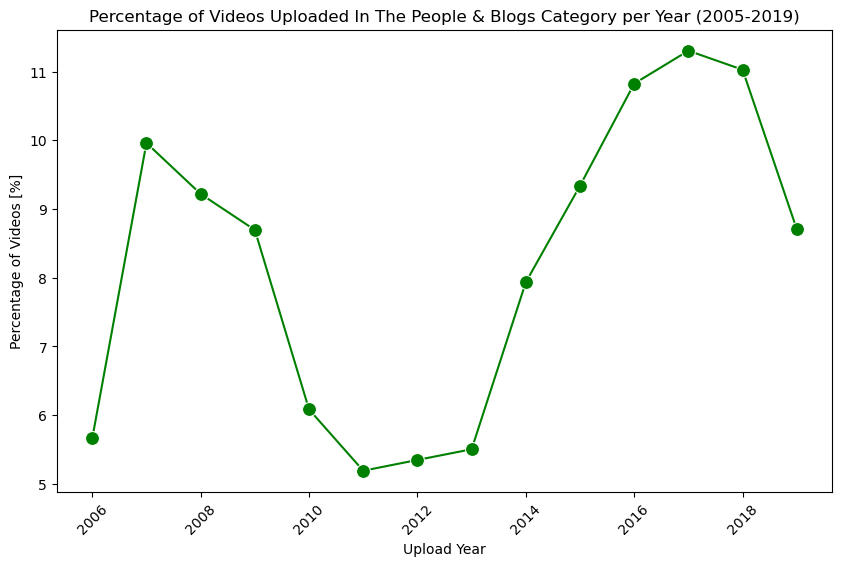

In [9]:
all_cc_yearly_video_count = df_feather["upload_date"].dt.year.value_counts().sort_index()
pb_yearly_video_count = df_feather[df_feather["categories"]==CATEGORY]["upload_date"].dt.year.value_counts().sort_index()

# calculate percentage of videos in People & Blogs category
pb_percentage = pb_yearly_video_count / all_cc_yearly_video_count * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=pb_percentage.index, y=pb_percentage.values, color="g", marker="o", markersize=10)
plt.xticks(rotation=45)
plt.ylabel("Percentage of Videos [%]")
plt.xlabel("Upload Year")
plt.title("Percentage of Videos Uploaded In The People & Blogs Category per Year (2005-2019)")
plt.show();

## Category evolution over time

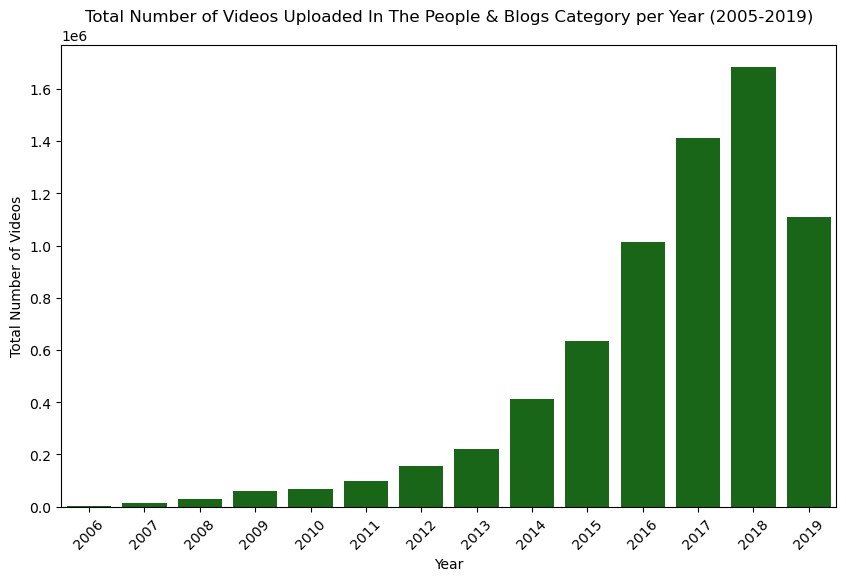

In [10]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=pb_yearly_video_count.index, y=pb_yearly_video_count.values, color="g", saturation=0.6)
plt.xticks(rotation=45)
plt.ylabel("Total Number of Videos")
plt.xlabel("Year")
plt.title("Total Number of Videos Uploaded In The People & Blogs Category per Year (2005-2019)")
plt.show();

## Apply log scale to the y-axis

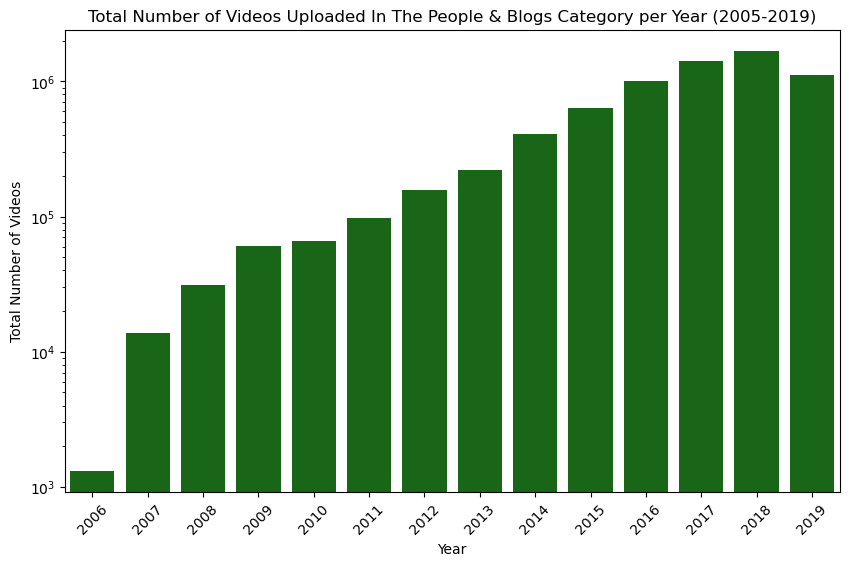

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pb_yearly_video_count.index, y=pb_yearly_video_count.values, color="g", saturation=0.6)
plt.yscale("log")
plt.xticks(rotation=45)
plt.ylabel("Total Number of Videos")
plt.xlabel("Year")
plt.title("Total Number of Videos Uploaded In The People & Blogs Category per Year (2005-2019)")
plt.show();